#### In this image classification problem, I have taken famous handwritten digits, mnist datasets from keras library..

At first I will make my own standard neural network model to predict the images and after that I will take LeNet CNN model that was first introduced by Yann LeCun at 1998 .. and then we will compare these two...at last I also tune the model with keras tuner and will see if any improvement happen..

* Importing libraries

In [120]:
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,Flatten
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import math

from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

Loading MNIST Data sets

In [121]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Data sets loaded...')

Data sets loaded...


In [122]:
x_train = x_train/255.0
x_test = x_test/255.0
print('Data sets processed...')
print(f'train shape:{x_train.shape} and test shape:{x_test.shape}')

Data sets processed...
train shape:(60000, 28, 28) and test shape:(10000, 28, 28)


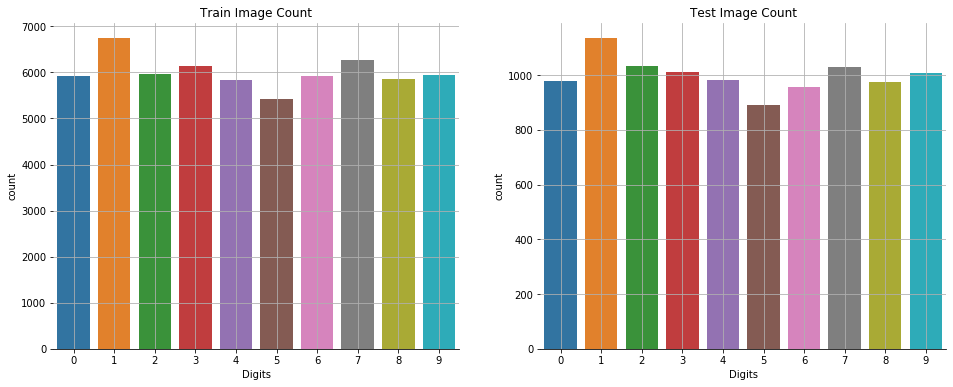

In [123]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
sns.countplot(y_train,ax=ax1)
sns.countplot(y_test,ax=ax2)
ax1.set_xlabel('Digits')
ax1.set_title('Train Image Count')
ax2.set_xlabel('Digits')
ax2.set_title('Test Image Count')
ax1.grid()
ax2.grid()
sns.despine(left=True)
plt.show()

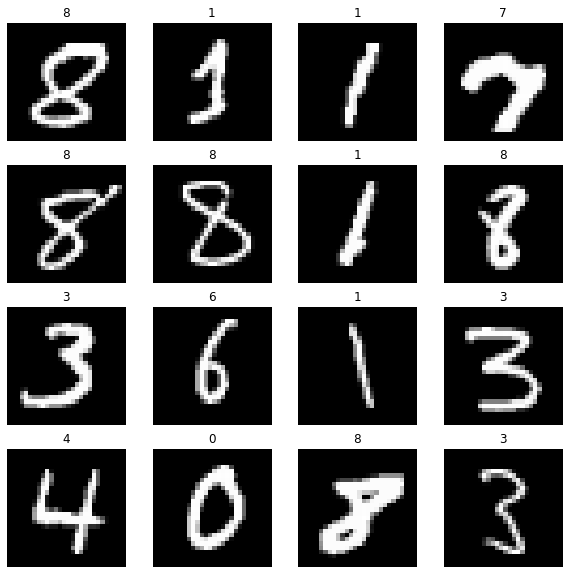

In [124]:
fig, axes = plt.subplots( 4,4,figsize = (10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        axe.imshow(x_train[index], cmap='gray')
        axe.set_title(y_train[index])
        axe.set_axis_off()

# First Making ANN Model 

In [125]:
x_train = x_train.reshape(-1,784)
y_train = keras.utils.to_categorical(y_train,num_classes=10)
x_test = x_test.reshape(-1,784)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [9]:
model = Sequential() # my ANN model

model.add(Dense(1024, activation='relu', input_dim=784))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
                
adam = Adam(learning_rate=0.0004)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [11]:
hist = model.fit(x_train, y_train,epochs=80,validation_data=(x_test,y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 10s 170us/step - loss: 4.3718 - accuracy: 0.7746 - val_loss: 0.2709 - val_accuracy: 0.9322
Epoch 2/80
60000/60000 [==============================] - 12s 194us/step - loss: 0.6046 - accuracy: 0.8661 - val_loss: 0.1988 - val_accuracy: 0.9452
Epoch 3/80
60000/60000 [==============================] - 12s 196us/step - loss: 0.3733 - accuracy: 0.8999 - val_loss: 0.1604 - val_accuracy: 0.9547
Epoch 4/80
60000/60000 [==============================] - 12s 198us/step - loss: 0.2905 - accuracy: 0.9185 - val_loss: 0.1423 - val_accuracy: 0.9599
Epoch 5/80
60000/60000 [==============================] - 12s 205us/step - loss: 0.2449 - accuracy: 0.9304 - val_loss: 0.1266 - val_accuracy: 0.9642
Epoch 6/80
60000/60000 [==============================] - 12s 204us/step - loss: 0.2052 - accuracy: 0.9420 - val_loss: 0.1160 - val_accuracy: 0.9666
Epoch 7/80
60000/60000 [==============================] 

In [21]:
result = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 66us/step


In [20]:
print('Test Accuracy  :',round(result[1],4)*100,'%')
print('Test Error rate:',round(result[0],4))

Test Accuracy  : 98.54 %
Test Error rate: 0.1121


In [24]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
acc = np.array(acc)*100 
val_acc = np.array(val_acc)*100


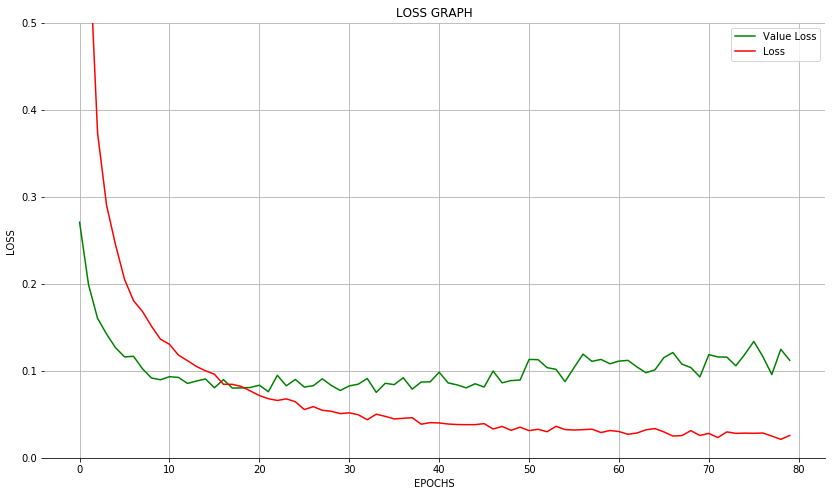

In [26]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(hist.history['val_loss'])),hist.history['val_loss'],'-g')
plt.plot(np.arange(len(hist.history['loss'])),hist.history['loss'],c='r')
plt.ylim(0.0,0.5)
plt.title('LOSS GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS ')
plt.legend(['Value Loss','Loss'], loc='upper right')
plt.grid()
sns.despine(left=True)
plt.show()

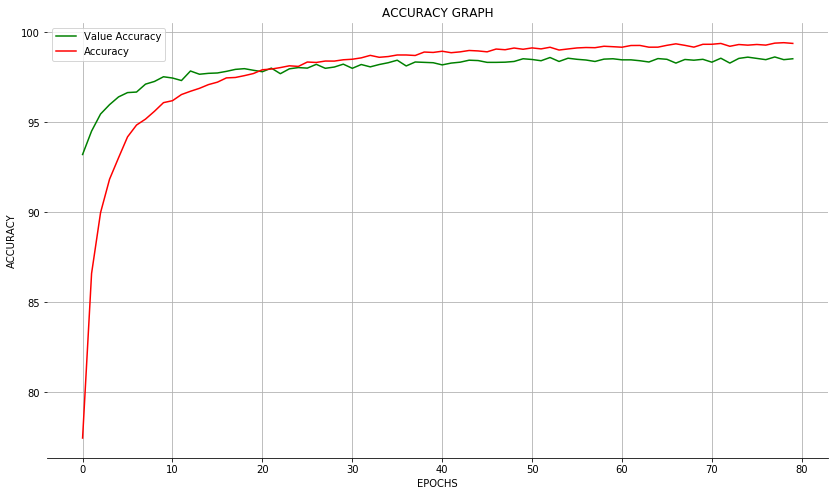

In [27]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_acc)),val_acc,'-g')
plt.plot(np.arange(len(acc)),acc,c='r')
plt.title('ACCURACY GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(['Value Accuracy','Accuracy'], loc='upper left')
plt.grid()
sns.despine(left=True)
plt.show()

**Finding few wrong predictions**

In [32]:
pred = model.predict(x_test)

In [33]:
wrong_pred = []
wrong_image = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(pred[i]):
        wrong_pred.append(np.argmax(pred[i]))
        wrong_image.append(x_test[i])
    else:
        pass

In [34]:
accuracy = (len(pred)-len(wrong_pred))*100/len(pred)
print('Calculating Actual Accuracy :',accuracy,'%')

Calculating Actual Accuracy : 98.54 %


In [35]:
print(f'Total Number of Correct Predicted Images from test data :{10000-len(wrong_pred)}')
print(f'Total Number of Wrong Predicted Images from test data   :{len(wrong_pred)}')

Total Number of Correct Predicted Images from test data :9854
Total Number of Wrong Predicted Images from test data   :146


**Results for ANN model is not Bad**

In [44]:
model.save('mnist_ann.h5')                     # saving model
del model
print('model saved..and deleted..')

model saved..and deleted..


### Now we will go for CNN model

* You can see the different error rate with different classifier from this site -> click below

http://yann.lecun.com/exdb/mnist/

## *Now, I will train this image datasets with CNN algorithm, similar to LeNet architecture, first introduced by Yann LeeCun in 1998..

### the model was like this


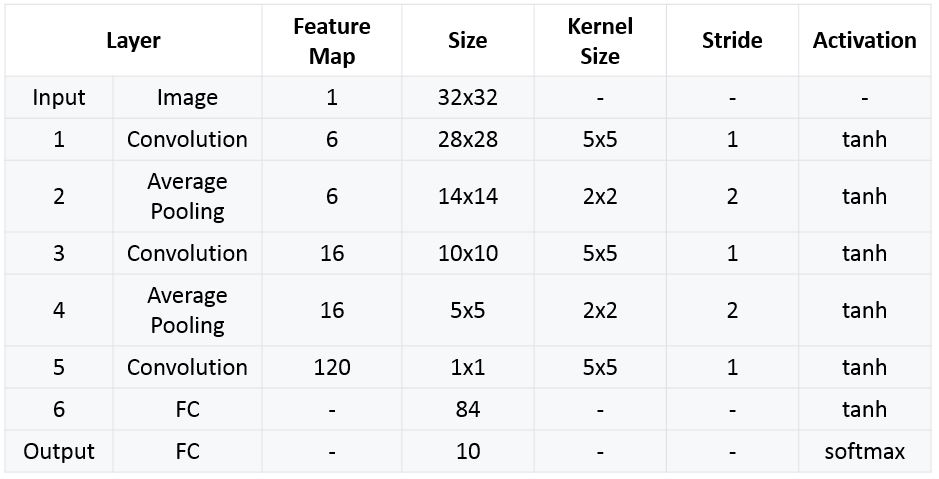


# Making LeNet like CNN model

### reshaping the data sets for CNN model

In [126]:
xtrain = x_train.reshape(-1,28,28,1)
xtest = x_test.reshape(-1,28,28,1)

In [127]:
xtrain.shape,xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [132]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(6, (5, 5), activation='relu',padding='same', input_shape=(xtrain[0].shape)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(120, (5, 5), activation='relu'))

# ANN-LAYERS
model.add(Flatten())
model.add(Dense(84, activation='relu'))

# Classification layer
model.add(Dense(10, activation='softmax'))

adam = Adam(learning_rate=0.0002,beta_1=0.9,beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

#### In comparison to LeNet I have changed only two things ->
#### 1. taken MaxPooling2D inspite of AveragePooling2D
#### 2. taken Relu activation function inspite of tanh
#### however all other parameters are similar..

In [134]:
hist = model.fit(xtrain, y_train,validation_data=(xtest,y_test),batch_size=32,epochs=50,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 23s - loss: 0.3615 - accuracy: 0.8953 - val_loss: 0.1371 - val_accuracy: 0.9575
Epoch 2/50
 - 24s - loss: 0.1142 - accuracy: 0.9657 - val_loss: 0.0866 - val_accuracy: 0.9727
Epoch 3/50
 - 22s - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0684 - val_accuracy: 0.9781
Epoch 4/50
 - 19s - loss: 0.0656 - accuracy: 0.9798 - val_loss: 0.0614 - val_accuracy: 0.9803
Epoch 5/50
 - 22s - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0458 - val_accuracy: 0.9858
Epoch 6/50
 - 23s - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 7/50
 - 21s - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0396 - val_accuracy: 0.9873
Epoch 8/50
 - 21s - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 9/50
 - 24s - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0505 - val_accuracy: 0.9828
Epoch 10/50
 - 19s - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0367 - val_accuracy: 0.9877
Epoch 11/

In [220]:
print('Test Accuracy  :',round(score[1]*100,3),'%')
print('Test Error rate:',round(score[0],4))

Test Accuracy  : 99.12 %
Test Error rate: 0.0499


In [221]:
val_acc = hist.history['val_accuracy']
val_acc = np.array(val_acc)*100
acc = hist.history['accuracy']
acc = np.array(acc)*100
loss = hist.history['loss']
val_loss = hist.history['val_loss']

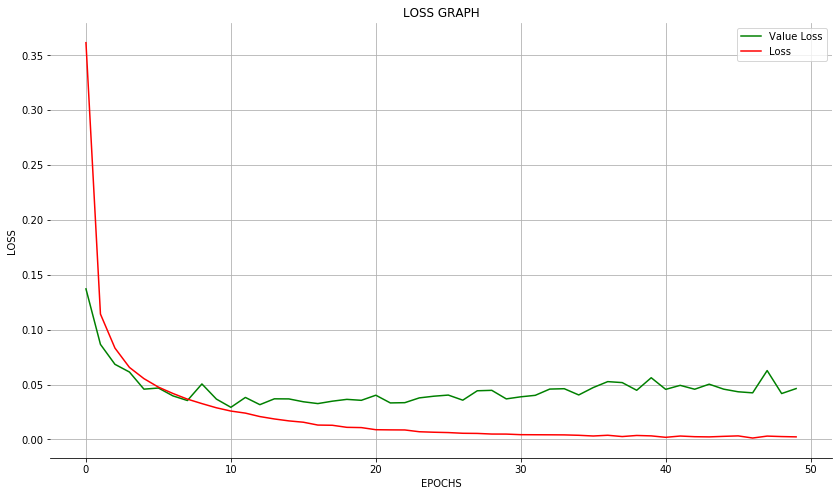

In [222]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_loss)),val_loss,'-g')
plt.plot(np.arange(len(loss)),loss,c='r')
plt.title('LOSS GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(['Value Loss','Loss'], loc='upper right')
plt.grid()
sns.despine(left=True)
plt.show()

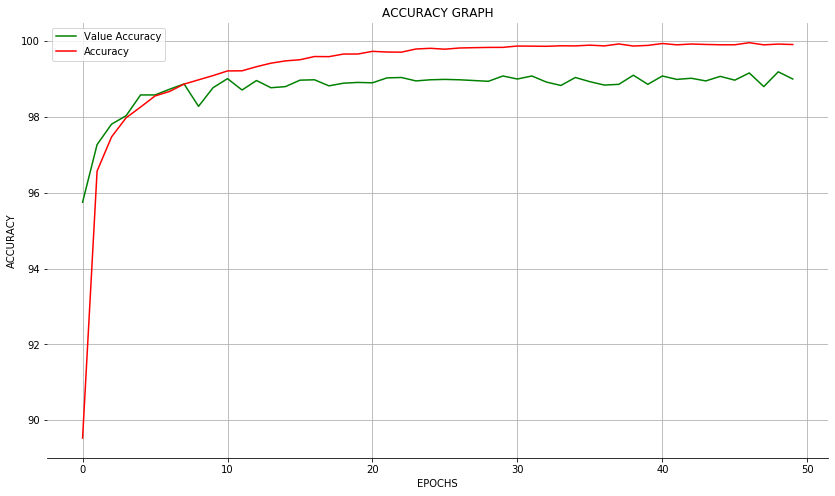

In [223]:
fig = plt.figure(figsize=(14,8))
plt.plot(np.arange(len(val_acc)),val_acc,'-g')
plt.plot(np.arange(len(acc)),acc,c='r')
plt.title('ACCURACY GRAPH')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend(['Value Accuracy','Accuracy'], loc='upper left')
plt.grid()
sns.despine(left=True)
plt.show()

In [224]:
preda = model.predict(xtest).round()

In [225]:
wrong_pred = []
wrong_image = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(preda[i]):
        wrong_pred.append(np.argmax(preda[i]))
        wrong_image.append(xtest[i])
    else:
        pass

In [226]:
accuracy = (len(preda)-len(wrong_pred))*100/len(preda)
print('Calculating Actual Accuracy :',accuracy,'%')

Calculating Actual Accuracy : 99.11 %


In [227]:
print(f'Total Number of Correct Predicted Images from test data :{len(y_test)-len(wrong_pred)}')
print(f'Total Number of Wrong Predicted Images from test data   :{len(wrong_pred)} out of {len(y_test)} images..')
print('Test Error rate:',round(score[0],4))

Total Number of Correct Predicted Images from test data :9911
Total Number of Wrong Predicted Images from test data   :89 out of 10000 images..
Test Error rate: 0.0499


In [228]:
print(f'total no. of prediction improved from test data:{146-89}')

total no. of prediction improved from test data:57


In [229]:
model.save('mnist_cnn_LeNet.h5')            # saving model
#del model                                   ,

In [230]:
model = load_model('mnist_cnn_LeNet.h5')    # loading model
print('Model loaded..')

Model loaded..


In [231]:
prediction = model.predict(x_test.reshape(-1,28,28,1)).round()

In [232]:
wrong_index_list = []
for i in range(len(y_test)):
    if np.argmax(y_test[i]) != np.argmax(prediction[i]):
        wrong_index_list.append(i)
    else:
        pass

Few predicted Images :->


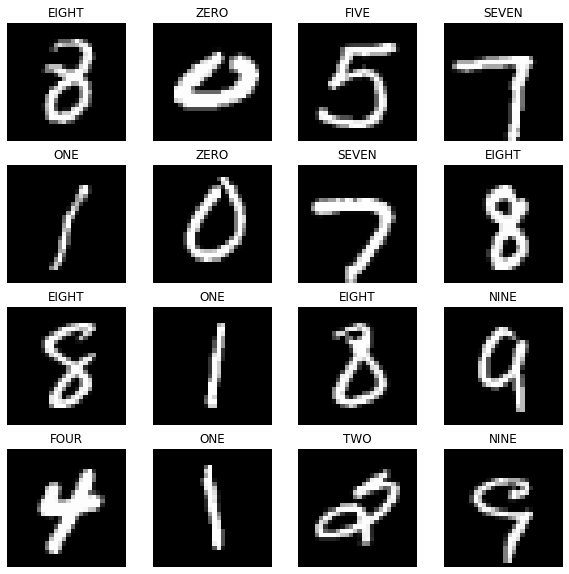

In [233]:
category = {0:'ZERO',1:'ONE',2:'TWO',3:'THREE',4:'FOUR',5:'FIVE',6:'SIX',7:'SEVEN',8:'EIGHT',9:'NINE'}
fig, axes = plt.subplots( 4,4,figsize = (10,10))
print('Few predicted Images :->')
for row in axes:
    for axe in row:
        index = np.random.randint(len(x_test))
        axe.imshow(x_test[index].reshape(28,28), cmap='gray')
        axe.set_title(category[np.argmax(y_test[index])])
        axe.set_axis_off()

Few Wrong predicted Images :->


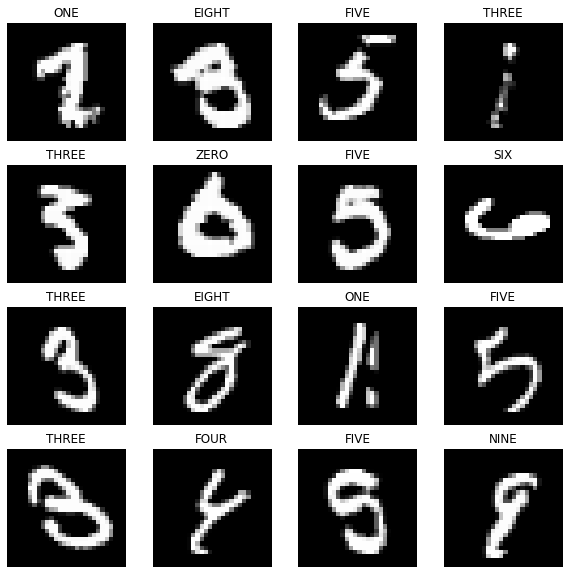

In [235]:
fig, axes = plt.subplots( 4,4,figsize = (10,10))
print('Few Wrong predicted Images :->')
for row in axes:
    for axe in row:
        index = np.random.randint(len(wrong_index_list))
        axe.imshow(x_test[wrong_index_list[index]].reshape(28,28), cmap='gray')
        axe.set_title(category[np.argmax(pred[wrong_index_list[index]])])
        axe.set_axis_off()

* conclusion:-

* From the first LeNet architecture we can find -->

1.  test error rate reduced much

2.  test accuracy also increased

3.  It was the first CNN algorithm ever used for image classification so far.

4.  Now a days many state of the art CNN algorithm has introduced and giving much more better result for image classifications.


In [236]:
Xtest = pd.read_csv('test.csv')
print("kaggle test data loaded..")
print("shape of test data :",Xtest.shape)

kaggle test data loaded..
shape of test data : (28000, 784)


In [252]:
X_test = np.array(Xtest).reshape(-1,28,28,1)
X_test.shape

(28000, 28, 28, 1)

In [253]:
X_test = X_test/255.0

In [254]:
len(X_test)

28000

In [255]:
prediction = model.predict(X_test)

In [256]:
len(prediction)

28000

In [258]:
submission = pd.read_csv('sample_submission.csv')
submission['Label'] = lstt
submission.head(2)

,ImageId,Label
0,1,2
1,2,0


In [259]:
def predictImage(index=0):
    plt.imshow(X_test[index].reshape(28,28))
    plt.title(category[lstt[index]])
    plt.axis('off')
    plt.show()

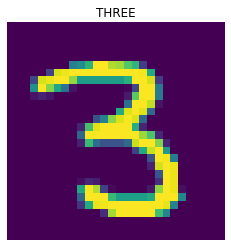

In [260]:
predictImage(index=2500)

In [261]:
submission.to_csv('sample_submission.csv',index=False) # best submission